In [1]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False 

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message


In [3]:
data=[]
conversation='chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MALAV\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

C:\Users\MALAV\AppData\Local\Temp\ipykernel_20208\1528190754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
C:\Users\MALAV\AppData\Local\Temp\ipykernel_20208\1528190754.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
C:\Users\MALAV\AppData\Local\Temp\ipykernel_20208\1528190754.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

,Date,Time,contact,Message,positive,negative,neutral
3,2021-06-09,1:41 pm,Smit,Malav,0.0,0.0,1.0
4,2021-06-09,1:41 pm,Smit,Room 202 me jaayenge ki nahi ?,0.0,0.0,1.0
9,2021-06-09,2:07 pm,Unknown..,Nahi bro,0.0,0.0,1.0
10,2021-06-09,2:07 pm,Unknown..,Hello elena,0.0,0.0,1.0
11,2021-06-09,2:22 pm,Smit,Kyu bruh,0.0,0.0,1.0


In [6]:
a=sum(data["positive"])
b=sum(data["negative"])
c=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutral")

score(a,b,c)

Neutral


In [7]:
df.contact.unique()

array([None, 'Smit', 'Unknown..'], dtype=object)

In [8]:
media_messages = df[df['Message'] == 'Oke'].shape[0]
print(media_messages)


#output will be zero as i have not included any media in text file

0


There are 371135 words in all the messages.


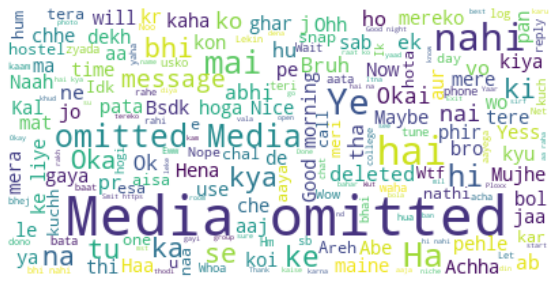

In [9]:
#Cloud Image of our chat..


text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()